In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# from collections import Counter
import nltk
import string
# import seaborn as sns

In [2]:
df=pd.read_csv(r"E:\Data Sets\spam.csv",delimiter=',' ,encoding='latin1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3133,ham,Ok going to sleep. Hope i can meet her.,NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [14]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

In [16]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


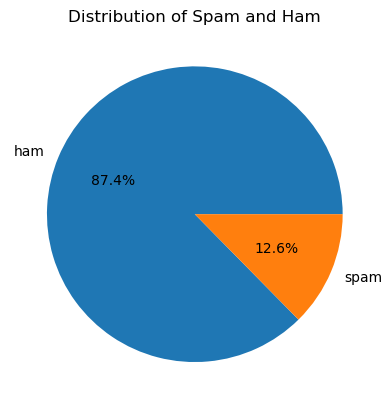

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam and Ham')
plt.show()

In [18]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [19]:
df.loc[:, 'transformed_text'] = df['text'].apply(transform_text)

In [20]:
df

,target,text,num_characters,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


In [21]:
df.loc[:, 'transformed_text_num_characters'] = df['transformed_text'].apply(len)

In [22]:
df

,target,text,num_characters,transformed_text,transformed_text_num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...,127
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...,86
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home,21
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest,17
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...,65


In [23]:
encoder=LabelEncoder()

In [24]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,text,num_characters,transformed_text,transformed_text_num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...,127
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36


In [26]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
df['text'] = df['text'].apply(preprocess_text)

In [27]:
X = df['text']
Y = df['target']

In [28]:
X.shape,Y.shape

((5169,), (5169,))

In [29]:
# def text_process(mess):
#     STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
#     nopunc = [char for char in mess if char not in string.punctuation]
#     nopunc = ''.join(nopunc)
#     return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 ,random_state=2) 

In [31]:
X_train.shape,Y_train.shape

((4135,), (4135,))

In [32]:
vectorizer = CountVectorizer()

In [33]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [34]:
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [35]:
y_pred_test = clf.predict(X_test)


In [36]:
test_accuracy = accuracy_score(Y_test,y_pred_test)


In [37]:
print(f"Training Accuracy: {test_accuracy}")

Training Accuracy: 0.9845261121856866
